In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cancer-probabilities/cancer-probabilities.csv


<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #7469B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #f1c40f; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">1. Import Libraries and Set Up</h2>
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

## <span style="color:transparent;">2. Load and Explore Dataset</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #7469B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #f1c40f; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">2. Load and Explore Dataset</h2>
</div>

In [3]:
# Load the dataset to explore its structure
file_path = '/kaggle/input/cancer-probabilities/cancer-probabilities.csv'
cancer_data = pd.read_csv(file_path)

## <span style="color:transparent;">3. Initial Dataset Overview</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #7469B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #f1c40f; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">3. Initial Dataset Overview</h2>
</div>

In [4]:
# Display the first few rows of the dataset to understand its structure
cancer_data.head()

,Sr No.,Smoking Habit,Drinking Habit,Biking Habit,Walking Habit,Jogging Habit,Probability of Cancer
0,1,Heavy,Frequent,Low,Low,Low,0.8
1,2,Occasional,Moderate,High,High,High,0.2
2,3,NaN,NaN,High,High,High,0.1
3,4,Heavy,Frequent,Low,Low,Low,0.9
4,5,Moderate,Occasional,Medium,Medium,Medium,0.4


## <span style="color:transparent;">4. Dataset Size</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #7469B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #f1c40f; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">4. Dataset Size</h2>
</div>

In [5]:
# Display dataset size
print('Dataset size:', cancer_data.shape)

Dataset size: (50, 7)


## <span style="color:transparent;">5. Check for Missing Values</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #7469B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #f1c40f; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">5. Check for Missing Values</h2>
</div>

In [6]:
# Check for missing values
missing_values = cancer_data.isnull().sum()

# Display missing values
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
Sr No.                    0
Smoking Habit            16
Drinking Habit           16
Biking Habit              0
Walking Habit             0
Jogging Habit             0
Probability of Cancer     0
dtype: int64


## <span style="color:transparent;">6. Check for Duplicates</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #7469B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #f1c40f; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">6. Check for Duplicates</h2>
</div>

In [7]:
# Check for duplicates
duplicates = cancer_data.duplicated()

# Display the duplicate rows
print("Duplicate Rows:")
print(cancer_data[duplicates])

Duplicate Rows:
Empty DataFrame
Columns: [Sr No., Smoking Habit, Drinking Habit, Biking Habit, Walking Habit, Jogging Habit, Probability of Cancer]
Index: []


## <span style="color:transparent;">7. Summary of Dataset</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #7469B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #f1c40f; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">7. Summary of Dataset</h2>
</div>

In [8]:
# Display summary information about the dataset
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sr No.                 50 non-null     int64  
 1   Smoking Habit          34 non-null     object 
 2   Drinking Habit         34 non-null     object 
 3   Biking Habit           50 non-null     object 
 4   Walking Habit          50 non-null     object 
 5   Jogging Habit          50 non-null     object 
 6   Probability of Cancer  50 non-null     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.9+ KB


In [9]:
# Display descriptive statistics for numerical columns
cancer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sr No.,50.0,25.5000,14.577380,1.00,13.25,25.500,37.75,50.0
Probability of Cancer,50.0,0.4072,0.325501,0.01,0.05,0.375,0.75,0.9


In [10]:
# Display the number of unique values in each column of the dataset
cancer_data.nunique()

Sr No.                   50
Smoking Habit             3
Drinking Habit            3
Biking Habit              3
Walking Habit             3
Jogging Habit             3
Probability of Cancer    15
dtype: int64

## <span style="color:transparent;">8. Handling Categorical and Numerical Columns</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #7469B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #f1c40f; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">8. Handling Categorical and Numerical Columns</h2>
</div>

In [11]:
# Identifying numerical and non-numerical columns in the dataset

# Numerical columns
numerical_columns = cancer_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Non-numerical columns
non_numerical_columns = cancer_data.select_dtypes(include=['object']).columns.tolist()

# Display the numerical and non-numerical columns
print("Categorical Columns:", non_numerical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['Smoking Habit', 'Drinking Habit', 'Biking Habit', 'Walking Habit', 'Jogging Habit']
Numerical Columns: ['Sr No.', 'Probability of Cancer']


In [12]:
# Get the unique values for each categorical column
for col in non_numerical_columns:
    print(f"Column: {col}")
    print(f"Unique Values: {cancer_data[col].unique()}")
    print("\n")

Column: Smoking Habit
Unique Values: ['Heavy' 'Occasional' nan 'Moderate']


Column: Drinking Habit
Unique Values: ['Frequent' 'Moderate' nan 'Occasional']


Column: Biking Habit
Unique Values: ['Low' 'High' 'Medium']


Column: Walking Habit
Unique Values: ['Low' 'High' 'Medium']


Column: Jogging Habit
Unique Values: ['Low' 'High' 'Medium']




In [13]:
# Dropping the "Sr No." column from the dataset as it's just an identifier and not needed for analysis
cancer_data= cancer_data.drop(columns=['Sr No.'])

# Displaying the cleaned dataset to confirm the drop
display(cancer_data.head())


,Smoking Habit,Drinking Habit,Biking Habit,Walking Habit,Jogging Habit,Probability of Cancer
0,Heavy,Frequent,Low,Low,Low,0.8
1,Occasional,Moderate,High,High,High,0.2
2,NaN,NaN,High,High,High,0.1
3,Heavy,Frequent,Low,Low,Low,0.9
4,Moderate,Occasional,Medium,Medium,Medium,0.4


- The 'Sr No.' column was dropped from the dataset as it serves as an **identifier** and is not necessary for analysis.

## <span style="color:transparent;">9. Cleaning the Dataset</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #7469B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #f1c40f; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">9. Cleaning the Dataset</h2>
</div>

In [14]:
# Define mapping for missing (NaN) values
habit_mapping = {
    'Smoking Habit': 'No Smoking',   # Assuming 'None' means no smoking
    'Drinking Habit': 'No Drinking'  # Assuming 'None' means no drinking
}

# Apply mapping to fill missing values (NaN) in the specified columns
cancer_data['Smoking Habit'].fillna(habit_mapping['Smoking Habit'], inplace=True)
cancer_data['Drinking Habit'].fillna(habit_mapping['Drinking Habit'], inplace=True)

In [15]:
# Displaying the unique values for "Smoking Habit" and "Drinking Habit" columns after replacement
print("Unique values for 'Smoking Habit' column:")
print(cancer_data['Smoking Habit'].unique())

print("\nUnique values for 'Drinking Habit' column:")
print(cancer_data['Drinking Habit'].unique())


Unique values for 'Smoking Habit' column:
['Heavy' 'Occasional' 'No Smoking' 'Moderate']

Unique values for 'Drinking Habit' column:
['Frequent' 'Moderate' 'No Drinking' 'Occasional']


### Justification for Assumption:

Missing values in the "Smoking Habit" and "Drinking Habit" columns are assumed to represent the absence of these habits. This assumption is justified based on the following:

1. **Contextual Understanding**: In datasets analyzing lifestyle habits, missing values are often interpreted as non-participation (e.g., no smoking or drinking).
2. **Consistency**: Other lifestyle columns have explicit categories (e.g., Low, Medium, High), so filling missing values with "No Smoking" or "No Drinking" ensures consistency.
3. **Analysis Integrity**: Imputing missing values this way preserves data size and ensures a clear distinction between participants who engage in these habits and those who do not.


In [16]:
# Check for missing values again
missing_values = cancer_data.isnull().sum()
print("Missing Values in Each Column After Replacement:")
print(missing_values)

Missing Values in Each Column After Replacement:
Smoking Habit            0
Drinking Habit           0
Biking Habit             0
Walking Habit            0
Jogging Habit            0
Probability of Cancer    0
dtype: int64


The dataset has been successfully cleaned, and the following changes were made:

1. The **"Sr No."** column was dropped.
2. Missing values in the **"Smoking Habit"** and **"Drinking Habit"** columns were filled with the mappings ("No Smoking" for smoking and "No Drinking" for drinking).
3. After replacement, there are no missing values in the dataset.

Here are the updated unique values for each categorical column:

- **Smoking Habit**: ['Heavy', 'Occasional', 'No Smoking', 'Moderate']
- **Drinking Habit**: ['Frequent', 'Moderate', 'No Drinking', 'Occasional']
- **Biking Habit**: ['Low', 'High', 'Medium']
- **Walking Habit**: ['Low', 'High', 'Medium']
- **Jogging Habit**: ['Low', 'High', 'Medium']

## <span style="color:transparent;">10. Exploratory Data Analysis (EDA)</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #7469B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #f1c40f; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">10. Exploratory Data Analysis (EDA)</h2>
</div>

The goal of this EDA is to explore the lifestyle factors that might influence the probability of cancer, such as smoking habits, drinking habits, and physical activities like biking, walking, and jogging. We will visualize the distributions of these variables and examine their correlations with the probability of cancer.

**Key steps in this section include:**

- **Univariate Analysis:** Understanding the distribution of each individual variable, including lifestyle habits and cancer probabilities.
- **Bivariate Analysis:** Investigating the relationships between lifestyle factors and cancer probabilities to see how one variable might affect the other.
- **Multivariate Analysis:** Studying interactions between multiple variables to gain deeper insights into how combinations of lifestyle factors impact cancer probability.

## <span style="color:transparent;">10.1 Univariate Analysis</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #7469B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #f1c40f; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">10.1 Univariate Analysis</h2>
</div>

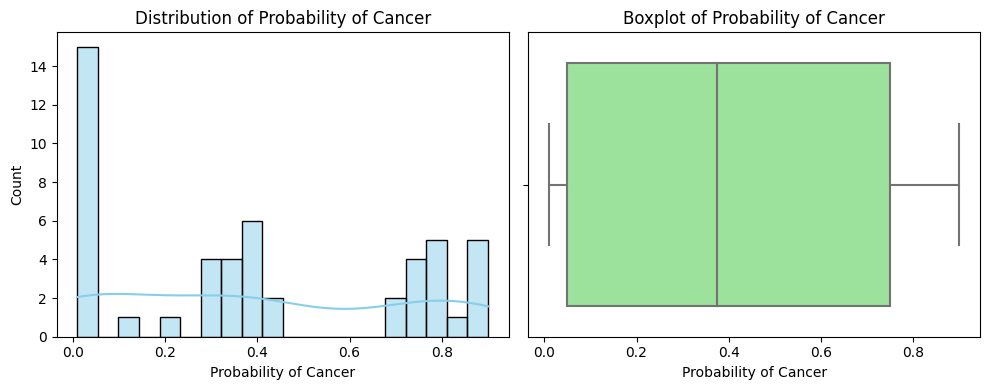

In [17]:
# The plot function now that the data is available
def plot_numerical_distribution(column_name):
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(cancer_data[column_name], bins=20, kde=True, color='skyblue')
    plt.title(f'Distribution of {column_name}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=cancer_data[column_name], color='lightgreen')
    plt.title(f'Boxplot of {column_name}')
    
    plt.tight_layout()
    plt.show()

# Plotting for 'Probability of Cancer'
plot_numerical_distribution('Probability of Cancer')


- The **histogram** shows the distribution of cancer probabilities, where lower probabilities are more frequent.
- The **boxplot** highlights the spread and any potential outliers in the cancer probabilities.


In [18]:
# Function to display barplot and pie chart for categorical columns
def plot_categorical_distribution(column_name):
    plt.figure(figsize=(10, 4))
    
    # Bar Chart for column distribution with column name on the y-axis
    plt.subplot(1, 2, 1)
    sns.countplot(y=column_name, data=cancer_data, palette='Set2')  # y-axis instead of x-axis
    plt.title(f'Distribution of {column_name}')
    
    # Add count labels on top of bars
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')
    
    # Remove the frame from the barplot
    sns.despine(left=True, bottom=True)
    
    # Pie Chart for percentage distribution
    plt.subplot(1, 2, 2)
    cancer_data[column_name].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=90, explode=[0.05]*cancer_data[column_name].nunique())
    plt.title(f'Percentage Distribution of {column_name}')
    plt.ylabel('')  # Hides the default ylabel
    
    # Display the plots
    plt.tight_layout()
    plt.show()

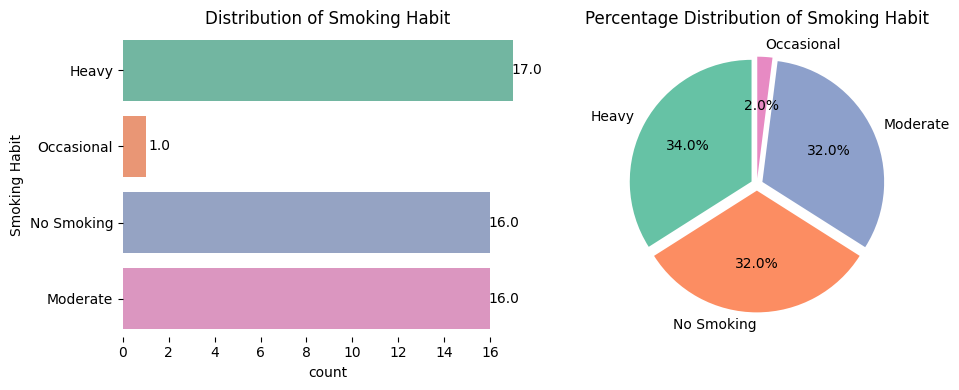

In [19]:
# for the 'Smoking Habit' column
plot_categorical_distribution('Smoking Habit')

1. **Smoking Habit**:
   - The most common categories are **Heavy** (34%) and **Moderate** (32%), with **No Smoking** also making up 32%.
   - The **Occasional** category represents only 2%, indicating that occasional smoking is rare compared to other habits.

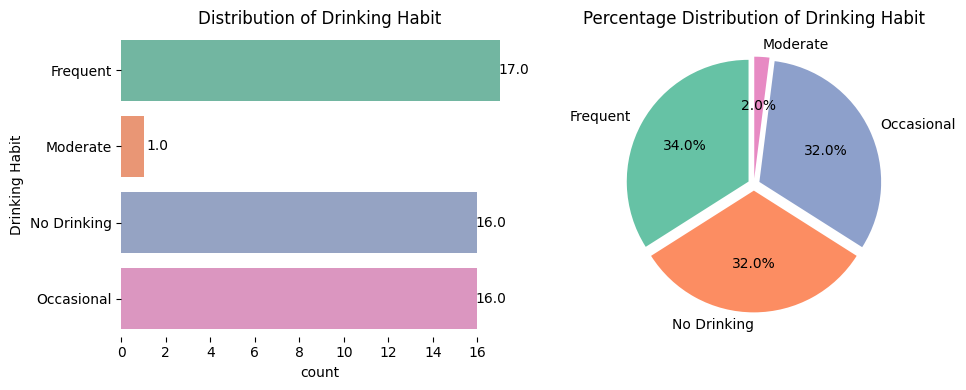

In [20]:
# for the 'Drinking Habit' column
plot_categorical_distribution('Drinking Habit')

2. **Drinking Habit**:
   - Similar to smoking, **Frequent** and **Occasional** drinking make up 34% and 32% respectively, with **No Drinking** representing another 32%.
   - **Moderate** drinking is minimal at 2%, showing that moderate drinking habits are uncommon in this dataset.

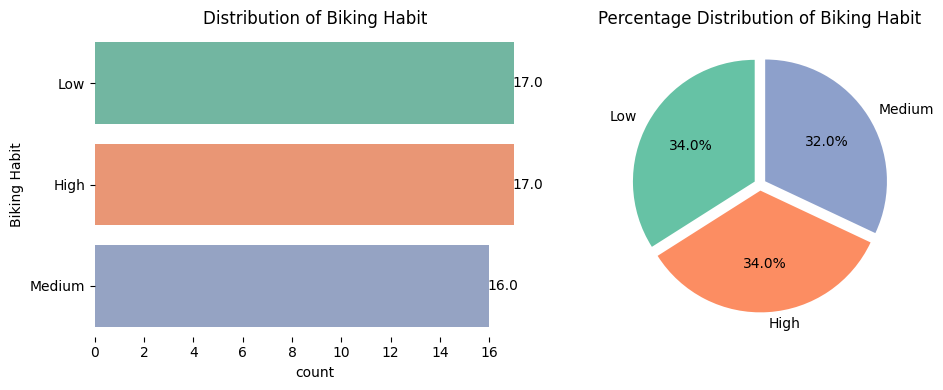

In [21]:
# for the 'Biking Habit' column
plot_categorical_distribution('Biking Habit')

3. **Biking Habit**:
   - The distribution is evenly split between **Low** (34%), **High** (34%), and **Medium** (32%) biking activity.
   - This balanced distribution suggests that all levels of biking activity are equally represented among individuals.

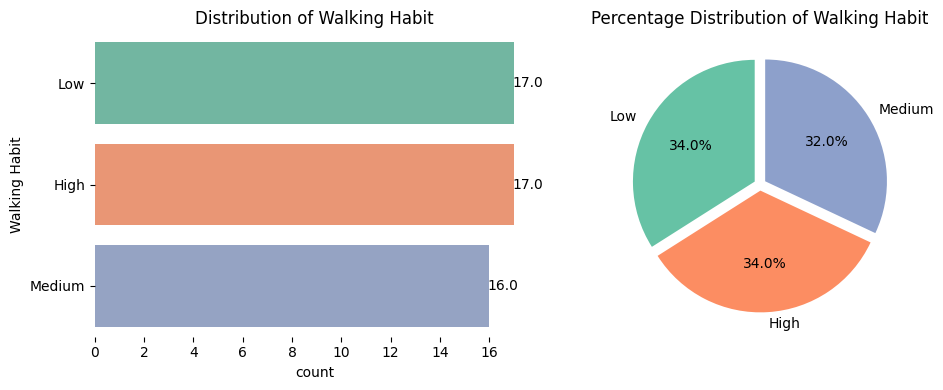

In [22]:
# for the 'Walking Habit' column
plot_categorical_distribution('Walking Habit')


4. **Walking Habit**:
   - Like biking, walking is evenly distributed between **Low** (34%), **High** (34%), and **Medium** (32%).
   - This suggests that walking habits are similarly spread across different activity levels.

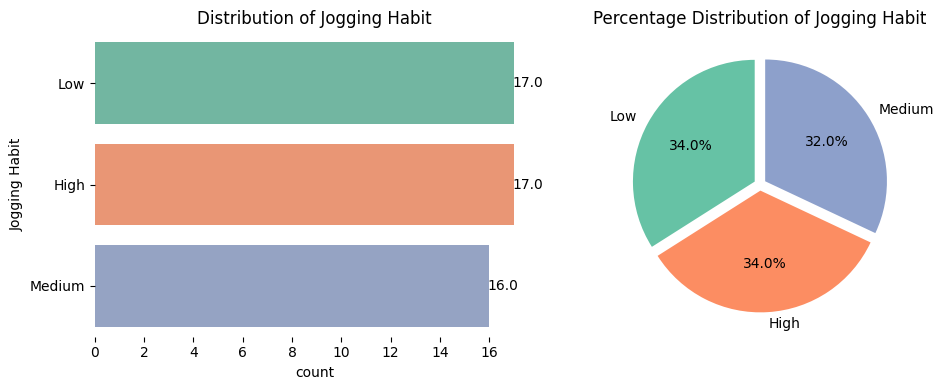

In [23]:
# for the 'Biking Habit' column
plot_categorical_distribution('Jogging Habit')

5. **Jogging Habit**:
   - Jogging follows the same trend, with **Low** (34%), **High** (34%), and **Medium** (32%) activity levels almost equally represented.
   - This indicates a balanced distribution of jogging habits, with no single level dominating the others.

**Insights:**
- The distributions for **Smoking** and **Drinking Habits** show that heavy and frequent behaviors are more common, while occasional and moderate levels are rare.
- **Biking**, **Walking**, and **Jogging** habits display a similar trend of equal distribution across low, medium, and high levels of activity, suggesting that individuals in the dataset have diverse activity levels.
- The overall lifestyle habits (smoking, drinking, exercise) seem to reflect a wide range of behaviors, from highly active to inactive and from heavy smoking/drinking to none.

## <span style="color:transparent;">10.2 Bivariate Analysis</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #7469B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #f1c40f; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">10.2 Bivariate Analysis</h2>
</div>

In [24]:
# Function to create scatter plot for bivariate analysis 
def plot_scatter_with_legend(column):
    plt.figure(figsize=(6, 4))
    sns.stripplot(x=column, y='Probability of Cancer', data=cancer_data, jitter=True, hue=column, palette='Set1')
    plt.title(f'{column} vs Probability of Cancer')
    plt.legend(title=column, loc='upper right')
    plt.show()

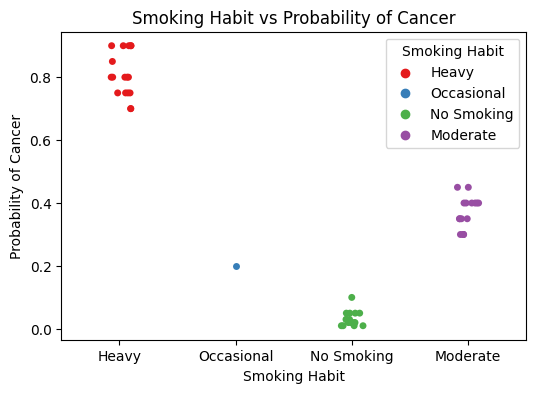

In [25]:
# Calling the function for Smoking Habit
plot_scatter_with_legend('Smoking Habit')

1. **Smoking Habit vs Probability of Cancer**:
   - **Heavy smokers** appear to have the highest probability of developing cancer, with most values concentrated between 0.8 and 0.9.
   - **Moderate smokers** show a lower probability, centered around 0.4.
   - **No Smoking** group has a very low probability of cancer, with most values around 0.2 or lower.
   - **Occasional smokers** are rare (only one observation) and show a moderate risk (~0.4).
   - There's a clear trend that heavier smoking correlates with higher cancer probabilities, while non-smokers have much lower risks.

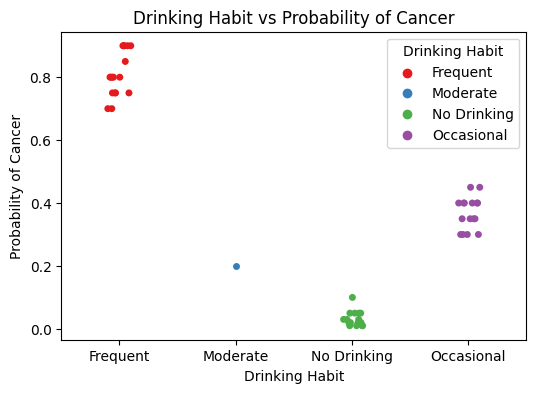

In [26]:
# Calling the function for Drinking Habit
plot_scatter_with_legend('Drinking Habit')

2. **Drinking Habit vs Probability of Cancer**:
   - **Frequent drinkers** show a high probability of cancer, similar to heavy smokers, with most values between 0.8 and 0.9.
   - **Moderate and Occasional drinkers** seem to have lower probabilities, around 0.4 and 0.2 respectively.
   - **No Drinking** group has the lowest cancer risk, with values centered around 0.1.
   - Frequent drinking, like heavy smoking, is associated with a higher risk of cancer, while abstaining from drinking corresponds to a significantly lower probability.

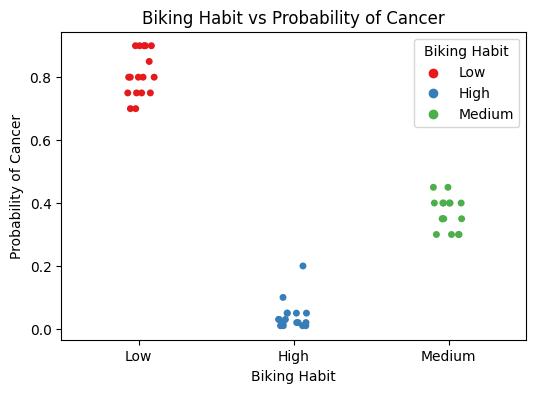

In [27]:
# Calling the function Biking Habit
plot_scatter_with_legend('Biking Habit')

3. **Biking Habit vs Probability of Cancer**:
   - **Low biking activity** has the highest probability of cancer, with most values close to 0.8 or higher.
   - **High biking activity** corresponds to a lower probability (~0.2 to 0.4), and
   - **Medium biking activity** shows an even lower probability (~0.1).
   - More frequent biking seems to correlate with lower cancer risk, suggesting that physical activity might play a protective role.

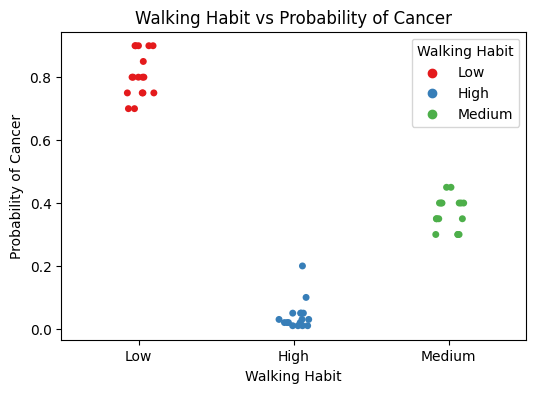

In [28]:
# Calling the function Walking Habit
plot_scatter_with_legend('Walking Habit')

4. **Walking Habit vs Probability of Cancer**:
   - **Low walking activity** shows the highest probability of cancer (~0.8 to 0.9).
   - **High walking activity** shows a wide range of probabilities, but generally lower than the low activity group.
   - **Medium walking activity** is associated with the lowest cancer probability, around 0.1.
   - More walking correlates with a lower cancer risk, similar to biking. Moderate to high walking activity appears to reduce the probability of cancer.

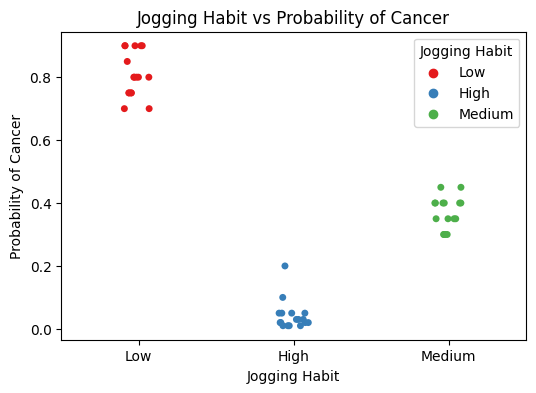

In [29]:
# Calling the function Jogging Habit
plot_scatter_with_legend('Jogging Habit')

5. **Jogging Habit vs Probability of Cancer**:
   - **Low jogging activity** corresponds to the highest cancer probability (~0.8 to 0.9).
   - **High jogging activity** shows a moderate probability (~0.2 to 0.4), and 
   - **Medium jogging activity** displays the lowest probability (~0.1).
   - Jogging, like walking and biking, follows the trend that higher levels of physical activity are associated with lower cancer risk.

**Insights:**
   - **Physical activity** (biking, walking, jogging) seems to have a protective effect, as higher activity levels consistently correlate with lower probabilities of cancer.
   - **Unhealthy habits** like **heavy smoking** and **frequent drinking** are associated with higher probabilities of cancer, suggesting a significant lifestyle risk factor.
   - The plots illustrate a consistent trend where **increased physical activity** and **abstinence from smoking and drinking** are linked with a lower probability of cancer.


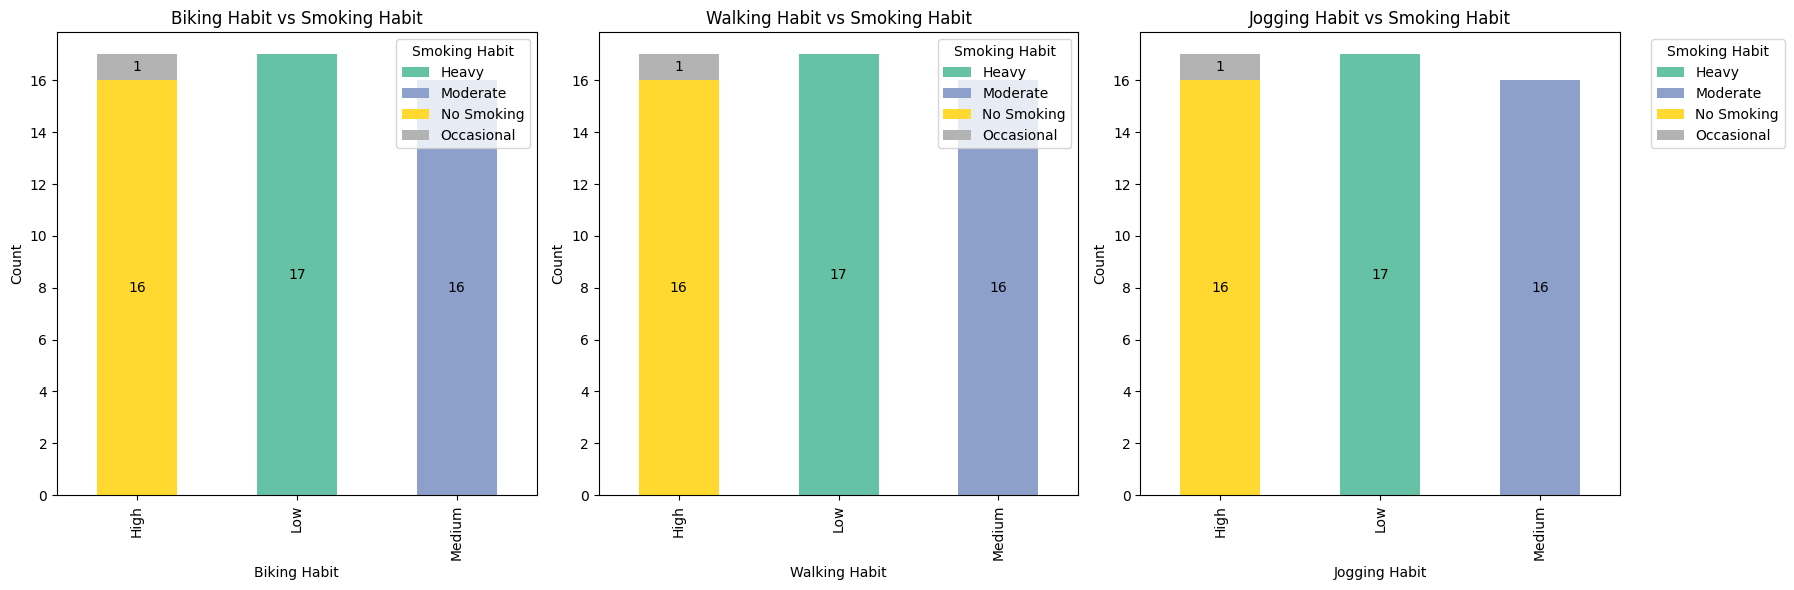

In [30]:
# Function to create a stacked bar chart 
def plot_stacked_bar_chart(cat_column1, cat_column2):
    # Create a crosstab for the two categorical columns
    cross_tab = pd.crosstab(cancer_data[cat_column1], cancer_data[cat_column2])
    return cross_tab

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.subplots_adjust(wspace=0.3)

lifestyle_columns = ['Biking Habit', 'Walking Habit', 'Jogging Habit']

for i, column in enumerate(lifestyle_columns):
    cross_tab = plot_stacked_bar_chart(column, 'Smoking Habit')
    cross_tab.plot(kind='bar', stacked=True, ax=axes[i], colormap='Set2')
    
    axes[i].set_title(f'{column} vs Smoking Habit')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(column)

    for bar in axes[i].patches:
        width = bar.get_width()
        height = bar.get_height()
        x = bar.get_x() + width / 2
        y = bar.get_y() + height / 2
        if height > 0:
            axes[i].text(x, y, f'{int(height)}', ha='center', va='center')

axes[2].legend(title='Smoking Habit', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Overall Summary:**
- Across all three physical activities (biking, walking, and jogging), **higher levels of physical activity** are consistently linked to **non-smoking behavior**.
- Conversely, **lower levels of physical activity** are predominantly associated with **heavier smoking** (i.e., heavy smokers tend to engage less in physical activity).
- **Occasional smokers** are rare, and they appear with very low counts across all activity categories.

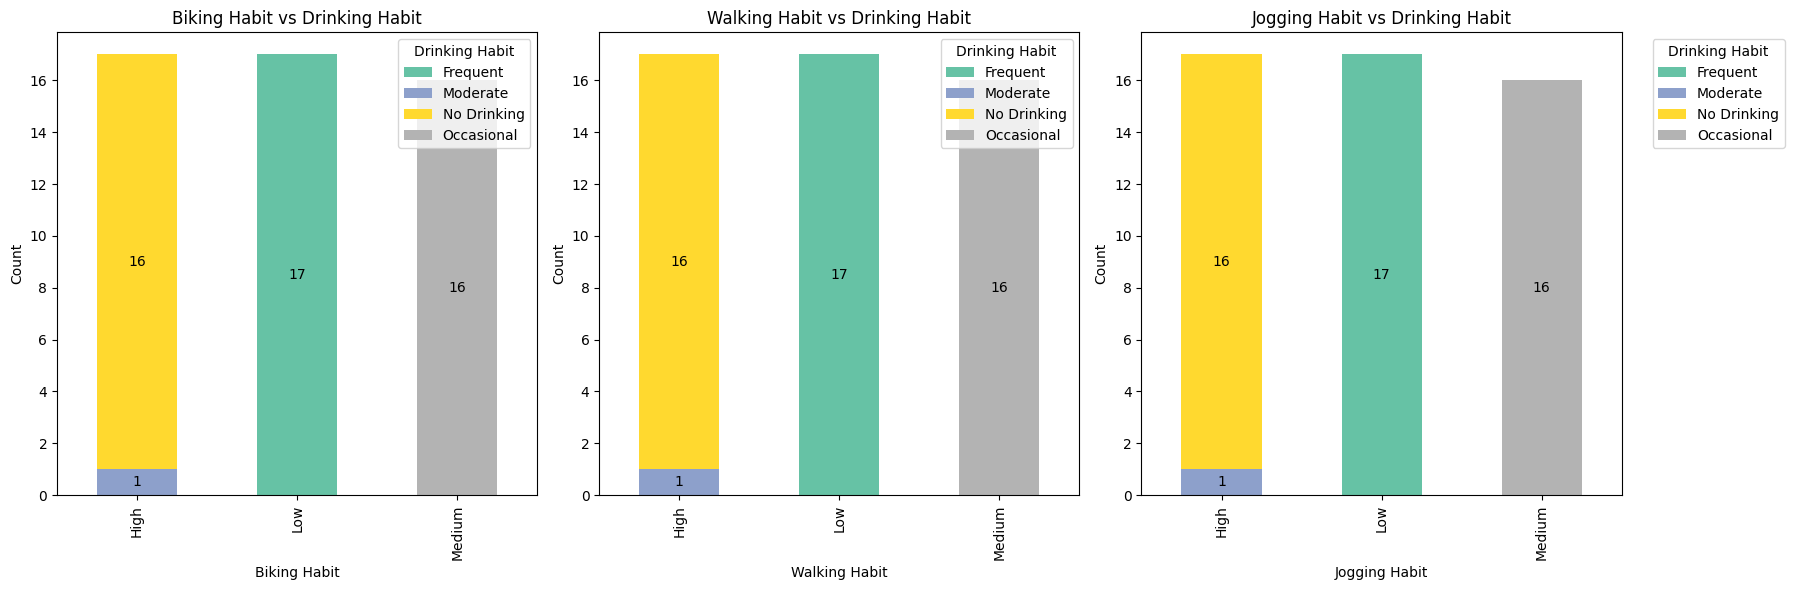

In [31]:
# Function to create a stacked bar chart 
def plot_stacked_bar_chart(cat_column1, cat_column2):
    # Create a crosstab for the two categorical columns
    cross_tab = pd.crosstab(cancer_data[cat_column1], cancer_data[cat_column2])
    return cross_tab

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.subplots_adjust(wspace=0.3)

lifestyle_columns = ['Biking Habit', 'Walking Habit', 'Jogging Habit']

for i, column in enumerate(lifestyle_columns):
    cross_tab = plot_stacked_bar_chart(column, 'Drinking Habit')
    cross_tab.plot(kind='bar', stacked=True, ax=axes[i], colormap='Set2')
    
    axes[i].set_title(f'{column} vs Drinking Habit')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(column)

    for bar in axes[i].patches:
        width = bar.get_width()
        height = bar.get_height()
        x = bar.get_x() + width / 2
        y = bar.get_y() + height / 2
        if height > 0:
            axes[i].text(x, y, f'{int(height)}', ha='center', va='center')

axes[2].legend(title='Drinking Habit', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Overall Summary:**
- Across all three physical activities (biking, walking, and jogging), **higher levels of physical activity** are consistently associated with **non-drinking behavior**.
- Conversely, **lower levels of physical activity** are predominantly associated with **frequent drinking** (i.e., people who engage in less physical activity tend to drink more frequently).
- **Moderate and occasional drinkers** are primarily linked with medium levels of physical activity, whereas non-drinkers are mostly engaged in high levels of physical activity.

## <span style="color:transparent;">10.3 Multivariate Analysis</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #7469B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #f1c40f; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">10.3 Multivariate Analysis</h2>
</div>

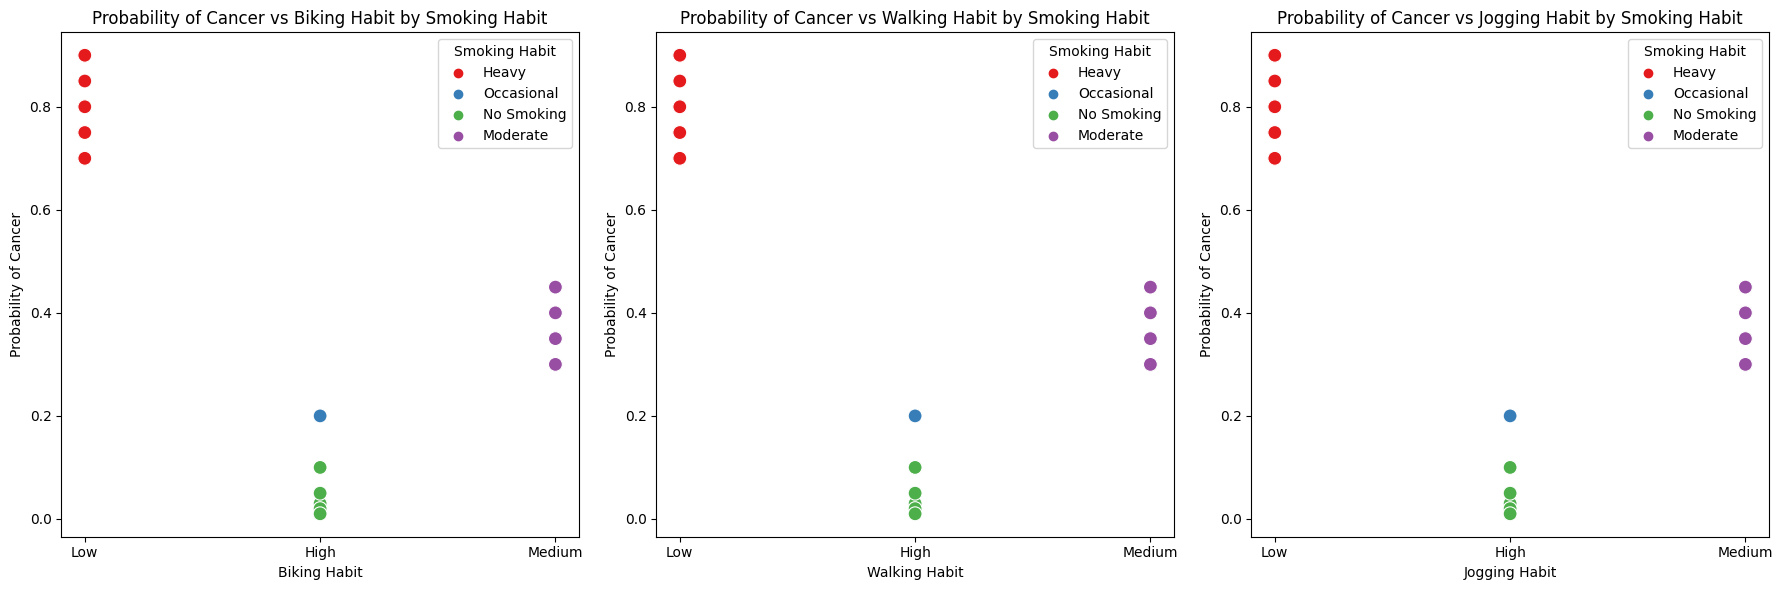

In [32]:
def plot_scatter_grid_by_smoking():
    lifestyle_columns = ['Biking Habit', 'Walking Habit', 'Jogging Habit']
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.subplots_adjust(wspace=0.4)  
    
    for i, column in enumerate(lifestyle_columns):
        sns.scatterplot(x=column, y='Probability of Cancer', hue='Smoking Habit', data=cancer_data, ax=axes[i], palette='Set1', s=100)
        axes[i].set_title(f'Probability of Cancer vs {column} by Smoking Habit')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Probability of Cancer')
    
    plt.tight_layout()
    plt.show()

plot_scatter_grid_by_smoking()

**Overall Insights:**
- **Heavy Smokers**: Across all lifestyle habits (biking, walking, jogging), heavy smokers consistently have a high probability of cancer (~0.8-0.9), showing that smoking is a dominant risk factor, independent of physical activity.
- **Non-Smokers**: Non-smokers exhibit the lowest cancer probability (~0.1), with increased physical activity corresponding to even lower risks.
- **Moderate and Occasional Smokers**: These groups generally show intermediate risk, with higher physical activity levels slightly reducing the probability of cancer.
- **Physical Activity**: Higher levels of biking, walking, and jogging are associated with lower cancer risks, but smoking remains a critical factor that overshadows the protective effects of physical activity for heavy smokers.
- This analysis highlights the strong influence of smoking on cancer risk and the potential protective role of physical activity for non-smokers and occasional smokers.

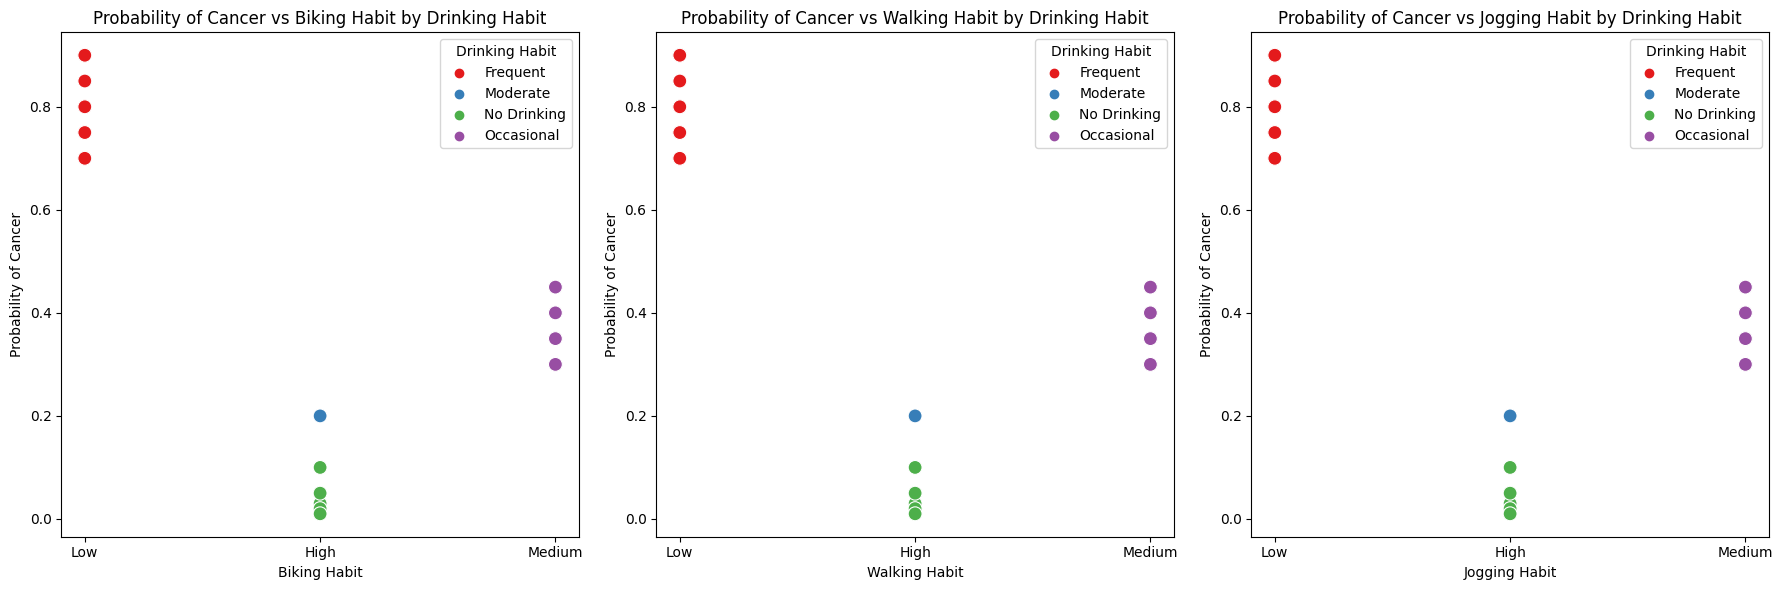

In [33]:
def plot_scatter_grid_by_drinking():
    lifestyle_columns = ['Biking Habit', 'Walking Habit', 'Jogging Habit']
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.subplots_adjust(wspace=0.4)  
    
    for i, column in enumerate(lifestyle_columns):
        sns.scatterplot(x=column, y='Probability of Cancer', hue='Drinking Habit', data=cancer_data, ax=axes[i], palette='Set1', s=100)
        axes[i].set_title(f'Probability of Cancer vs {column} by Drinking Habit' )
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Probability of Cancer')
    
    plt.tight_layout()
    plt.show()

plot_scatter_grid_by_drinking()


**Overall Insights:**
- **Frequent Drinkers**: Across all physical activities (biking, walking, jogging), frequent drinkers consistently show a high probability of cancer (~0.8-0.9), suggesting that frequent drinking is a major risk factor for cancer, independent of physical activity.
- **Non-Drinkers**: Non-drinkers exhibit the lowest probability of cancer (~0.1), and higher levels of physical activity (biking, walking, jogging) correlate with even lower cancer risk.
- **Occasional and Moderate Drinkers**: These groups tend to show intermediate cancer risk, with higher physical activity levels slightly reducing the probability of cancer.
- This analysis highlights the significant role of frequent drinking in elevating cancer risk, while physical activity appears to have a protective effect, particularly for non-drinkers.

## <span style="color:transparent;">11. Encoding Categorical Variables</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #7469B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #f1c40f; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">11. Encoding Categorical Variables</h2>
</div>

**Encoding Approach for Variables:**
1. **Smoking Habit and Drinking Habit**: Use **One-Hot Encoding** because these categories do not have a clear order (e.g., "Heavy" is not necessarily worse than "Moderate").
   
2. **Biking, Walking, and Jogging Habits**: Use **Ordinal Encoding** because these variables have a natural order from low to high activity.

### 1. Ordinal Encoding:

In [34]:
# Define the variables for ordinal encoding
ordinal_columns = ['Biking Habit', 'Walking Habit', 'Jogging Habit']
ordinal_mapping = [['Low', 'Medium', 'High']]  # Order matters

ordinal_encoder = OrdinalEncoder(categories=ordinal_mapping * len(ordinal_columns))
cancer_data[ordinal_columns] = ordinal_encoder.fit_transform(cancer_data[ordinal_columns])

print(cancer_data[ordinal_columns].head())

   Biking Habit  Walking Habit  Jogging Habit
0           0.0            0.0            0.0
1           2.0            2.0            2.0
2           2.0            2.0            2.0
3           0.0            0.0            0.0
4           1.0            1.0            1.0


### 2. One-Hot Encoding:

In [35]:
# Define the variables for one-hot encoding
onehot_columns = ['Smoking Habit', 'Drinking Habit']

cancer_data = pd.get_dummies(cancer_data, columns=onehot_columns, drop_first=True)

cancer_data.head()

,Biking Habit,Walking Habit,Jogging Habit,Probability of Cancer,Smoking Habit_Moderate,Smoking Habit_No Smoking,Smoking Habit_Occasional,Drinking Habit_Moderate,Drinking Habit_No Drinking,Drinking Habit_Occasional
0,0.0,0.0,0.0,0.8,False,False,False,False,False,False
1,2.0,2.0,2.0,0.2,False,False,True,True,False,False
2,2.0,2.0,2.0,0.1,False,True,False,False,True,False
3,0.0,0.0,0.0,0.9,False,False,False,False,False,False
4,1.0,1.0,1.0,0.4,True,False,False,False,False,True


## <span style="color:transparent;">12. Correlation Heatmap</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #7469B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #f1c40f; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">12. Correlation Heatmap</h2>
</div>

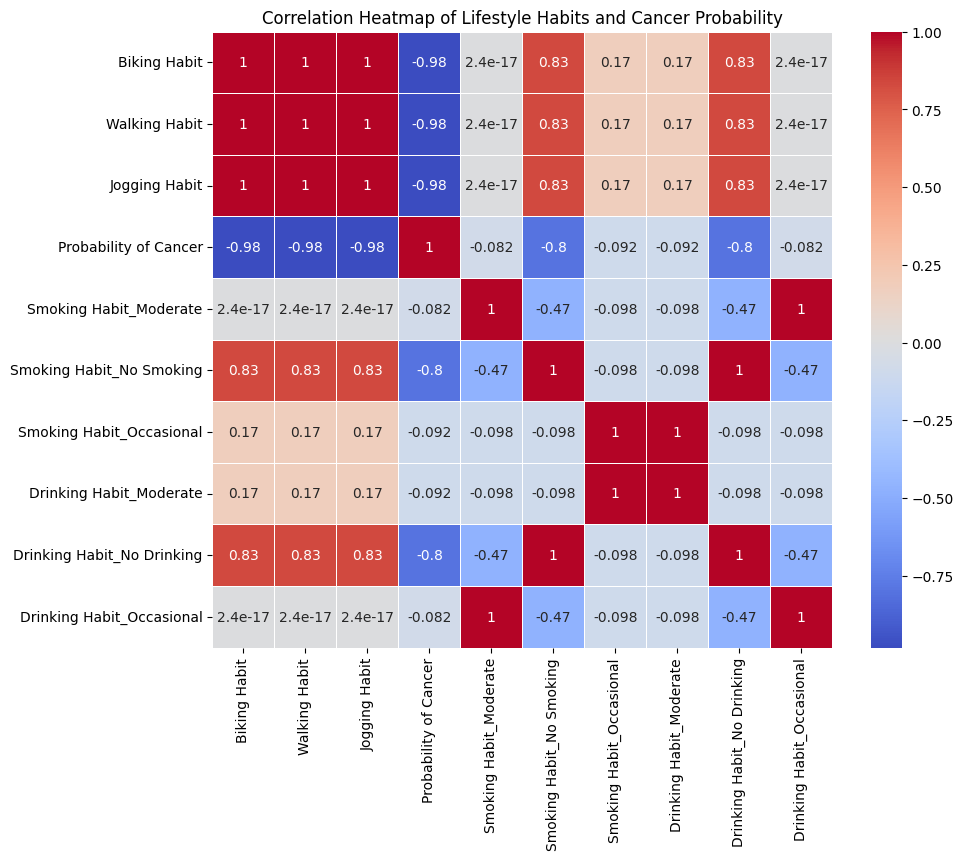

In [36]:
# Heatmap of correlations for multivariate analysis
plt.figure(figsize=(10, 8))
sns.heatmap(cancer_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Lifestyle Habits and Cancer Probability')
plt.show()


## <span style="color:transparent;">13. Predictive Modeling</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #7469B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #f1c40f; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">13. Predictive Modeling</h2>
</div>

In [37]:
# Features and target
X = cancer_data.drop('Probability of Cancer', axis=1)
y = cancer_data['Probability of Cancer']

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [38]:
# Scale the data (for models like Logistic Regression and SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Define the models
models = {
    'KNN Regressor': KNeighborsRegressor(),
    'SVR': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

In [40]:
# Function to evaluate regression models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Metrics for regression
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared (R2): {r2:.4f}")
    print('-'*40)

## <span style="color:transparent;">14 Model Performance Summary</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #7469B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #f1c40f; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">14 Model Performance Summary</h2>
</div>

In [41]:
# Train and evaluate each regression model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    if model_name in ['KNN Regressor', 'SVR']:
        evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    else:
        evaluate_model(model, X_train, X_test, y_train, y_test)

Evaluating KNN Regressor...
Model: KNeighborsRegressor
Mean Squared Error (MSE): 0.0045
R-squared (R2): 0.9537
----------------------------------------
Evaluating SVR...
Model: SVR
Mean Squared Error (MSE): 0.0037
R-squared (R2): 0.9624
----------------------------------------
Evaluating Decision Tree...
Model: DecisionTreeRegressor
Mean Squared Error (MSE): 0.0034
R-squared (R2): 0.9652
----------------------------------------
Evaluating Random Forest...
Model: RandomForestRegressor
Mean Squared Error (MSE): 0.0035
R-squared (R2): 0.9640
----------------------------------------
Evaluating Gradient Boosting...
Model: GradientBoostingRegressor
Mean Squared Error (MSE): 0.0034
R-squared (R2): 0.9652
----------------------------------------


- The **Decision Tree Regressor** and **Gradient Boosting Regressor** have the best performance with the lowest MSE (0.0034) and highest R2 (0.9652).
- **SVR** and **Random Forest Regressor** also perform well, with slightly higher MSE and lower R2 compared to the Decision Tree and Gradient Boosting models.
- **KNN Regressor** shows slightly lower performance than the other models but still provides decent results.

Based on the results, can consider using **Gradient Boosting Regressor** or **Decision Tree Regressor** for predictions, as they offer the best balance between accuracy and error in this case. 

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #f1c40f; padding: 10px; background-color: #7469B6; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h2 style="color: #f1c40f; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">🚀 If you found this notebook helpful, please consider giving it an upvote! 👍</h2>
    <p style="color: #ecf0f1; font-size: 18px; text-align: center;">Your support motivates me to create more useful content like this, and it helps others discover the notebook too! 🙌</p>
    <p style="color: #ecf0f1; font-size: 18px; text-align: center;">Thank you for your time, and I hope this notebook brings value to your data science journey! 💡😊</p>
</div>
